In [1]:
import sys

sys.path.append('../../DeepCell/')

In [2]:
manifest_path = 's3://prod.slapp.alleninstitute.org/behavior_slc_oct_2020/20201020135214/expert_output/ophys-experts-slc-oct-2020/manifests/output/output.manifest'
project_name = 'ophys-experts-slc-oct-2020'

In [15]:
from SlcDataset import SlcDataset
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [5]:
data = SlcDataset(manifest_path=manifest_path, project_name=project_name)

In [43]:
def get_random_roi(label):
    idxs = np.where(data.y == label)[0]
    idx = np.random.choice(idxs)
    roi_id = data.roi_ids[idx]
    
    with open(f'../data/mask_{roi_id}.png', 'rb') as f:
        img = Image.open(f)
        mask = np.array(img)
        
    with open(f'../data/max_{roi_id}.png', 'rb') as f:
        img = Image.open(f)
        max_ = np.array(img)

    with open(f'../data/avg_{roi_id}.png', 'rb') as f:
        img = Image.open(f)
        avg = np.array(img)
    
    return mask, max_, avg, roi_id
    
def display_differently_labeled_rois():
    rows = 1
    columns = 3
    
    cell_mask, cell_max, cell_avg, cell_roi_id = get_random_roi(label=1)
    imgs = [cell_mask, cell_max, cell_avg]
    type_ = ['mask', 'max', 'avg']
    fig = plt.figure(figsize=(20, 20))
    for i in range(1, columns*rows+1):
        fig.add_subplot(rows, columns, i, title=f'Cell {cell_roi_id} {type_[i-1]}')
        plt.imshow(imgs[i-1], cmap='gray', vmin=0, vmax=255)
    plt.show()
    
    not_cell_mask, not_cell_max, not_cell_avg, not_cell_roi_id  = get_random_roi(label=0)
    imgs = [not_cell_mask, not_cell_max, not_cell_avg]
    fig = plt.figure(figsize=(20, 20))
    for i in range(1, columns*rows+1):
        fig.add_subplot(rows, columns, i, title=f'Not Cell {not_cell_roi_id} {type_[i-1]}')
        plt.imshow(imgs[i-1], cmap='gray', vmin=0, vmax=255)
    plt.show()
    

    

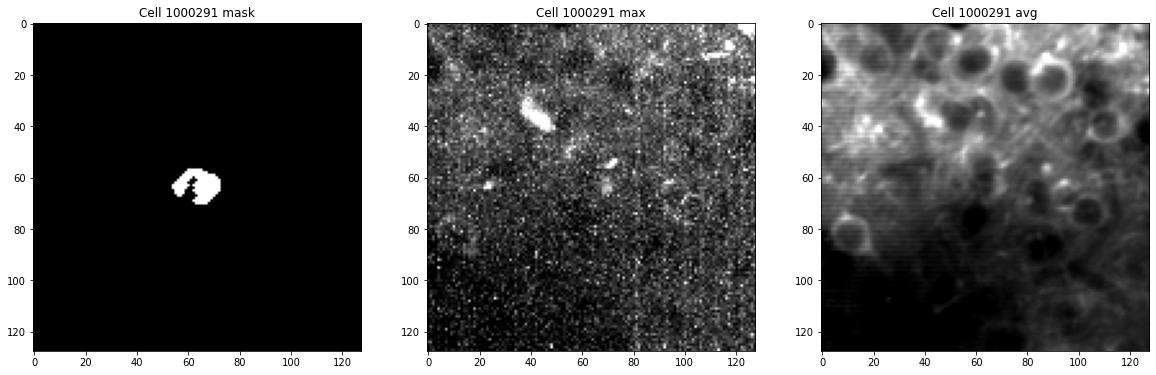

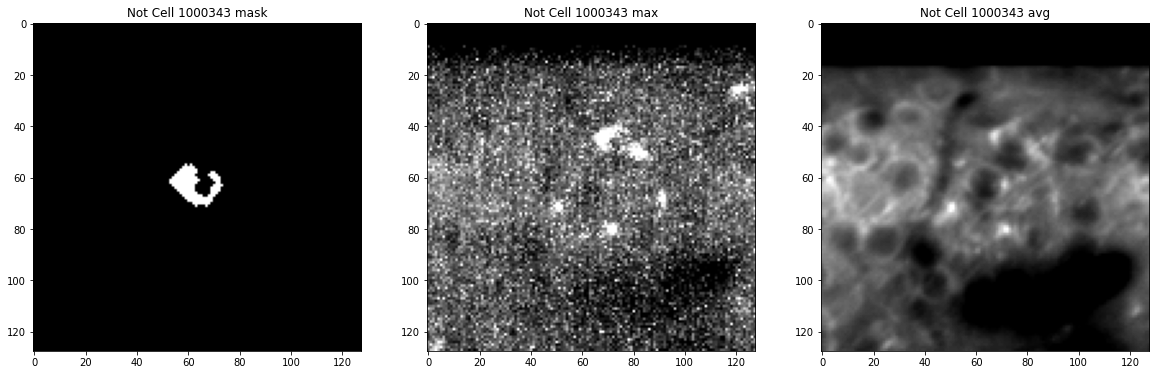

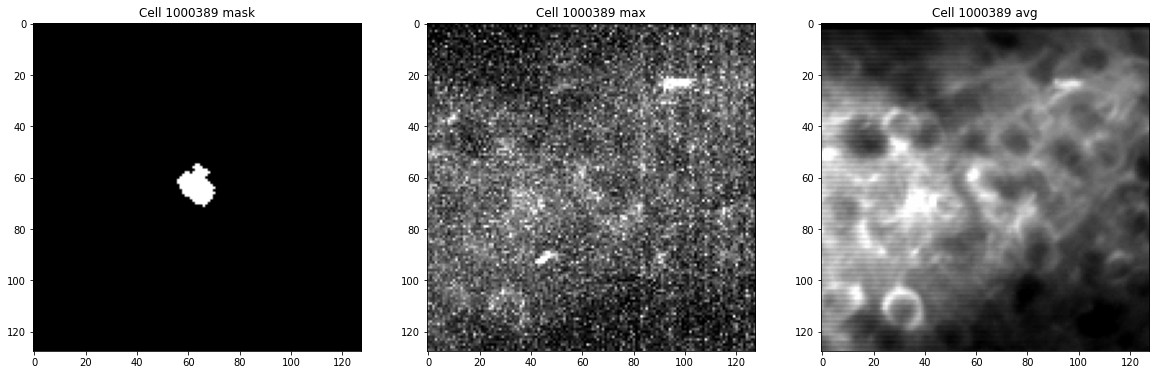

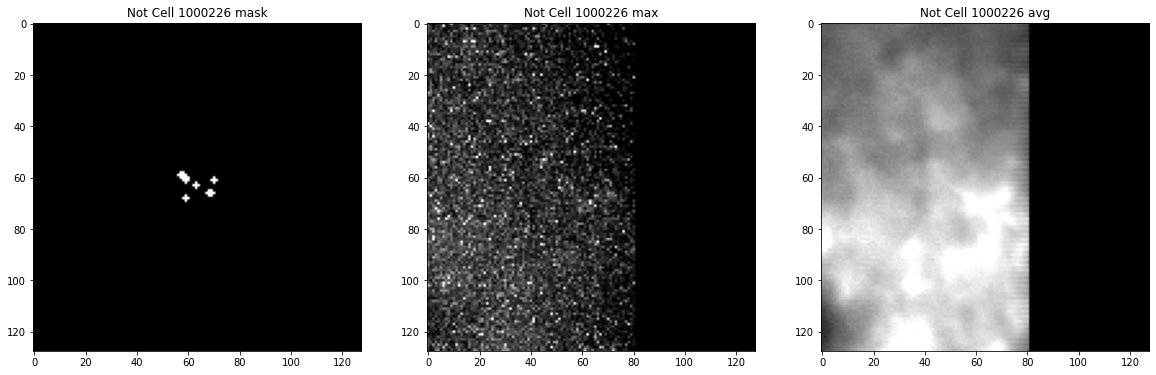

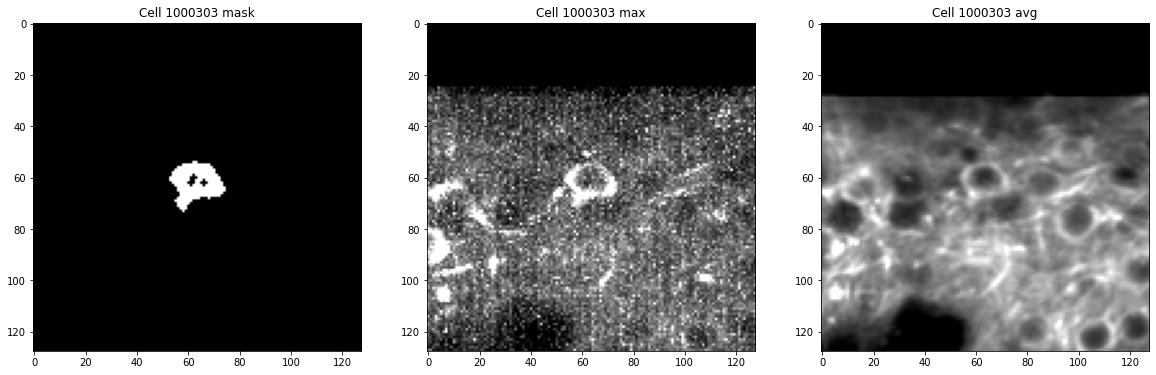

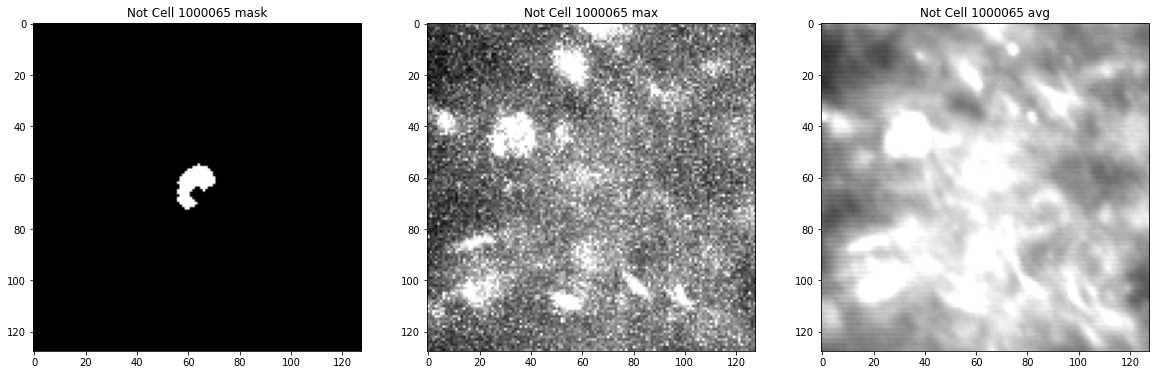

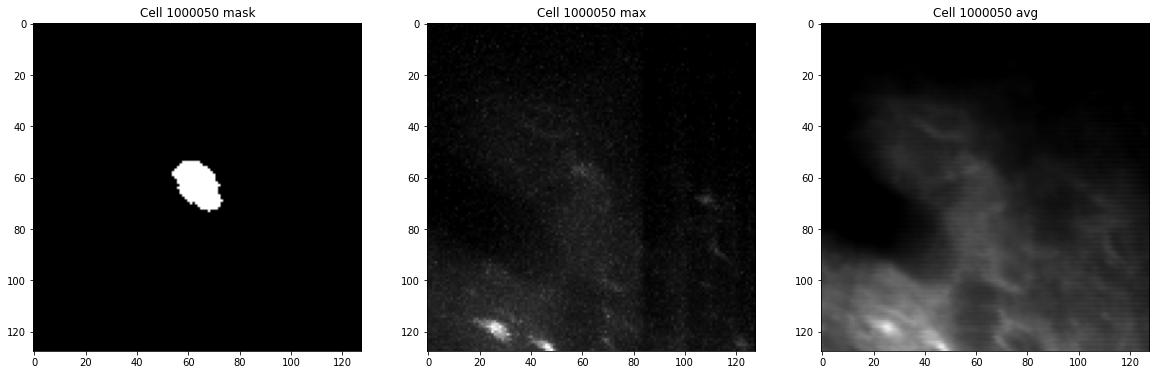

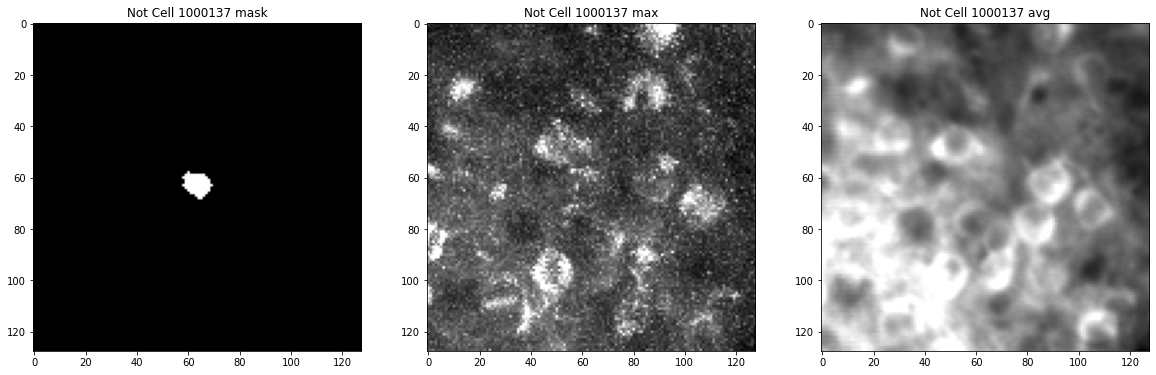

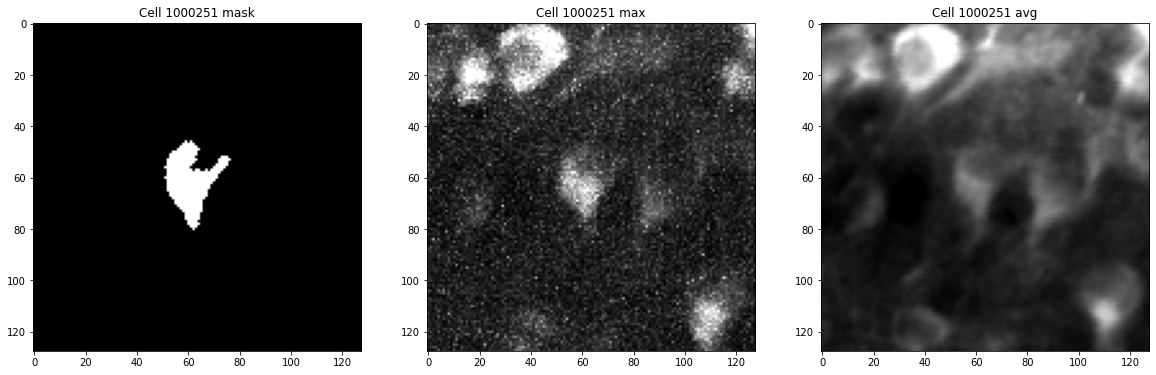

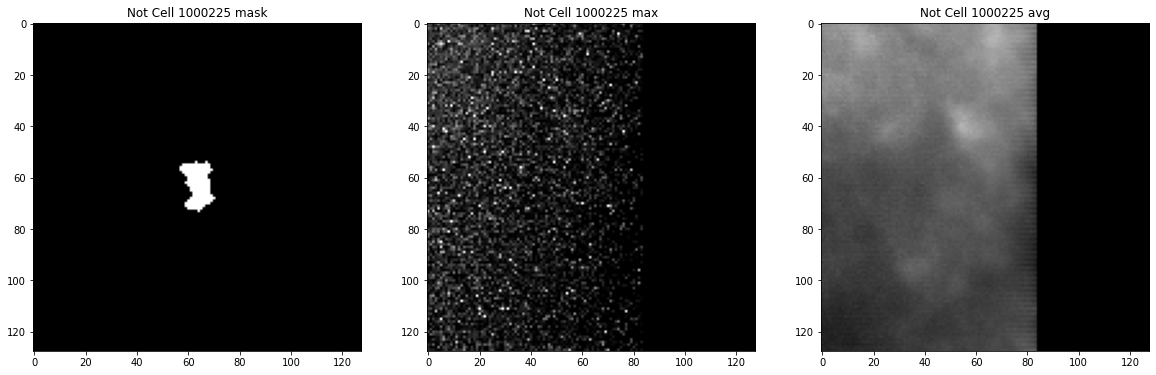

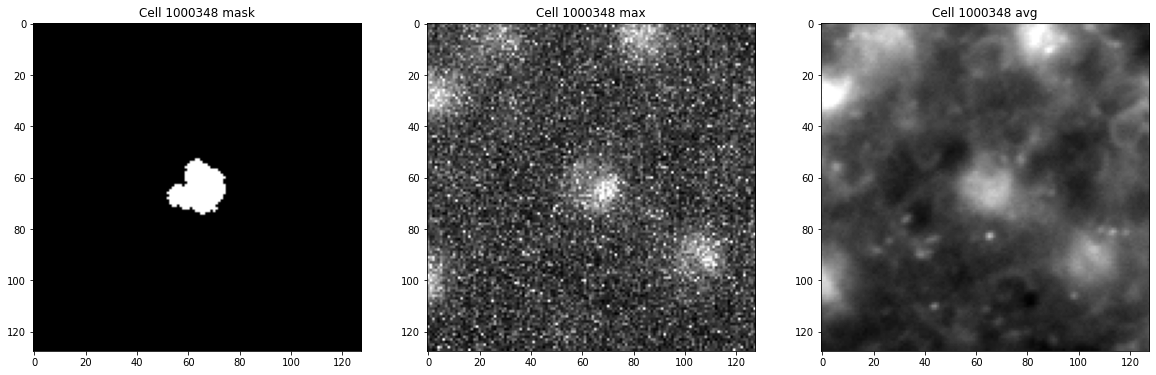

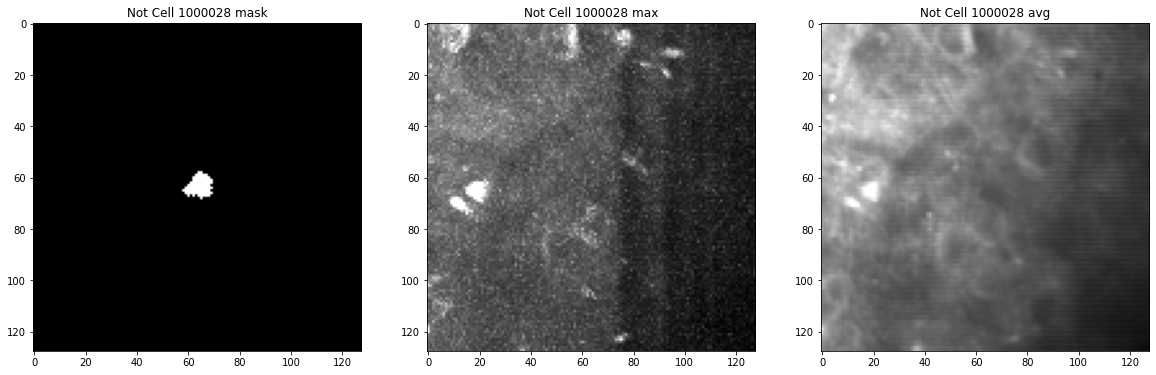

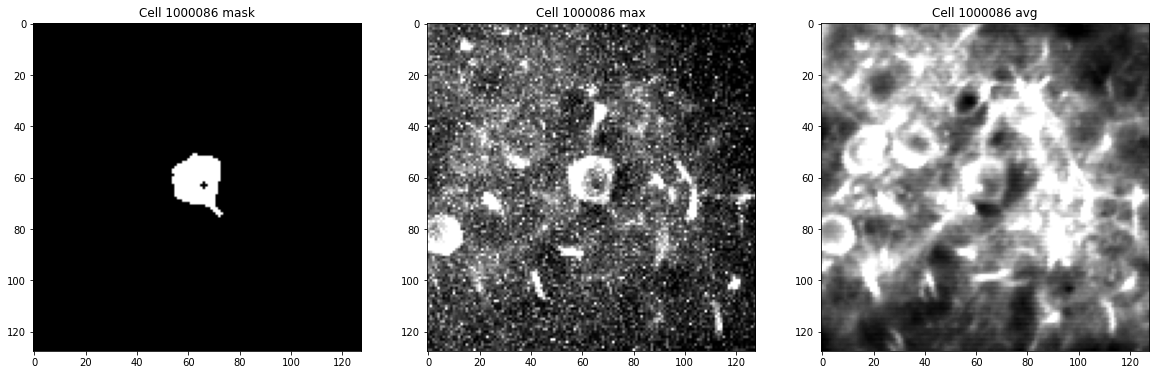

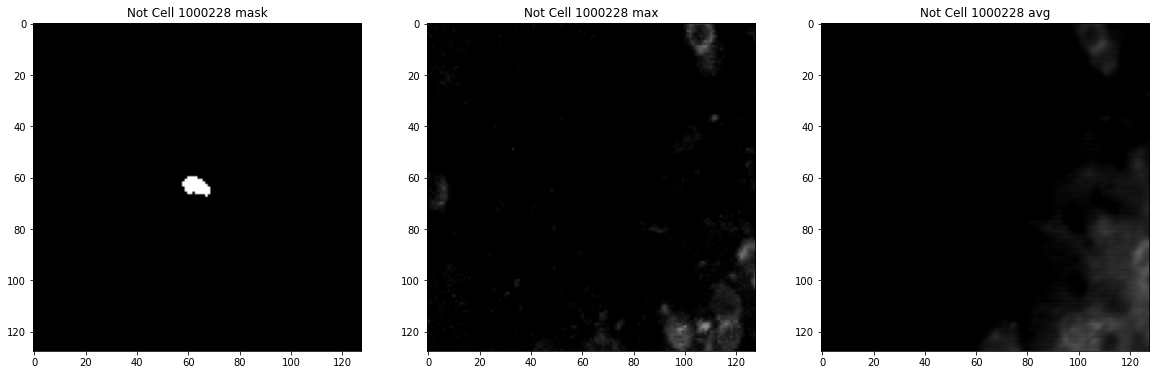

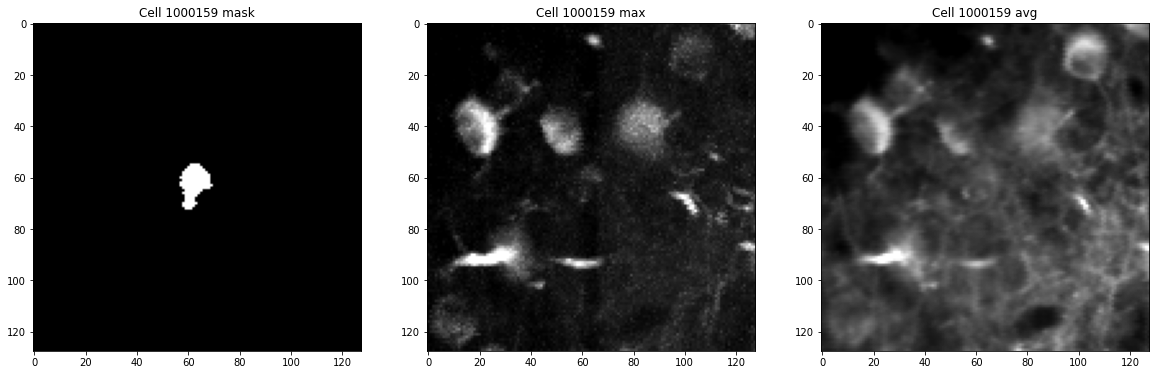

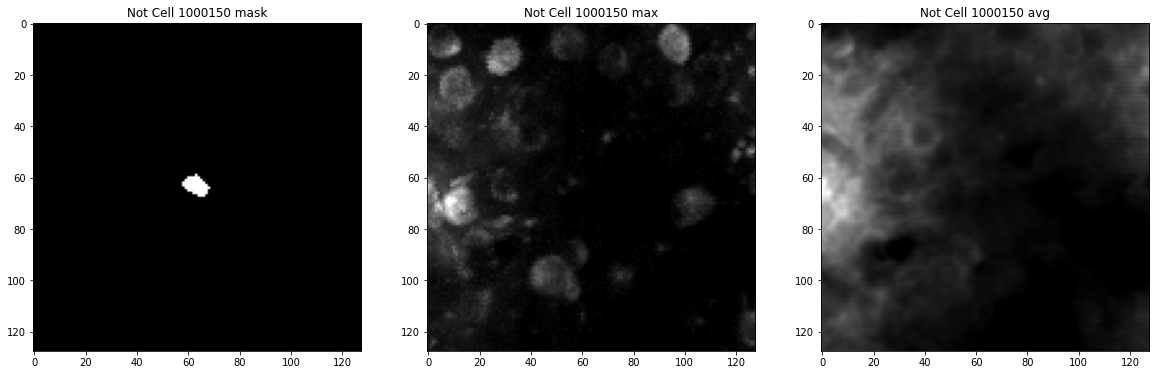

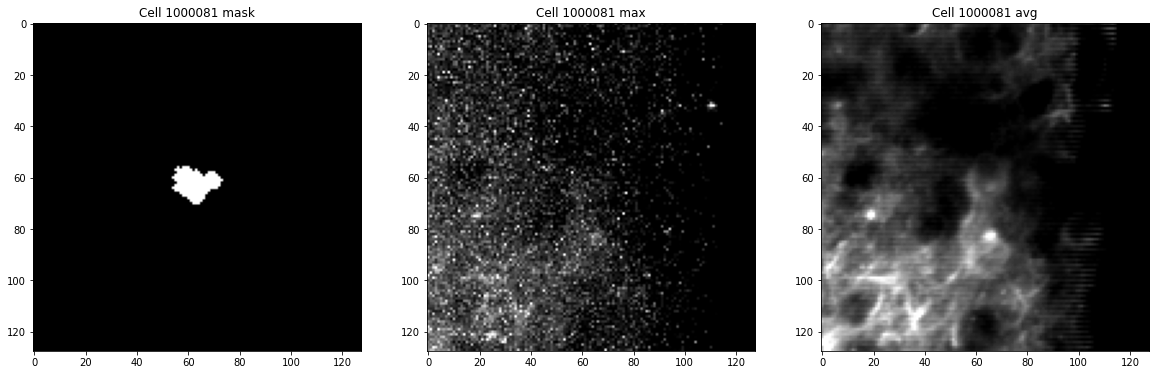

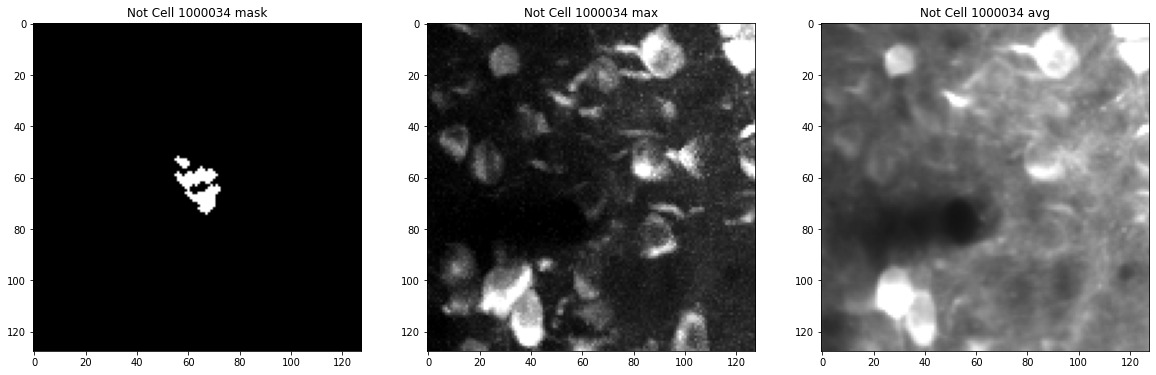

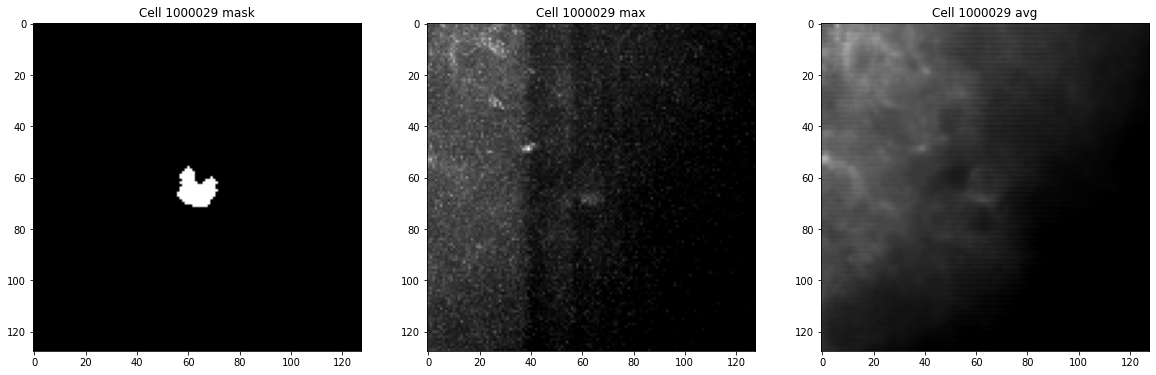

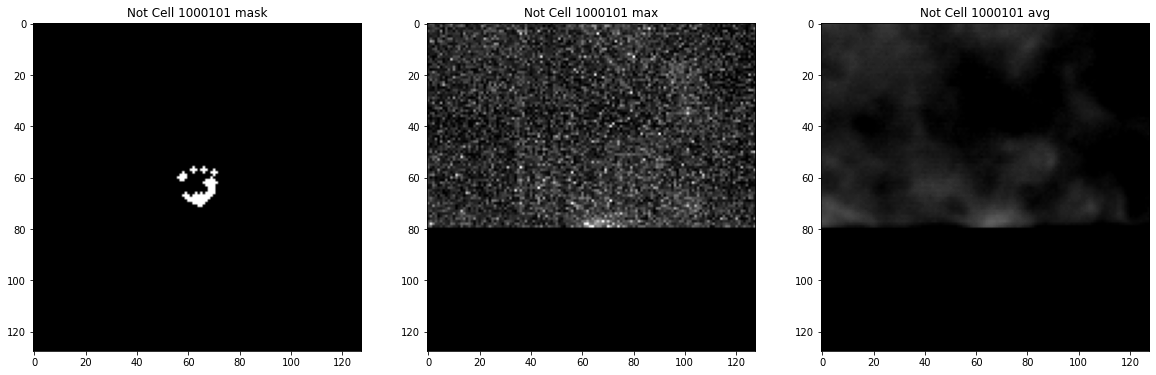

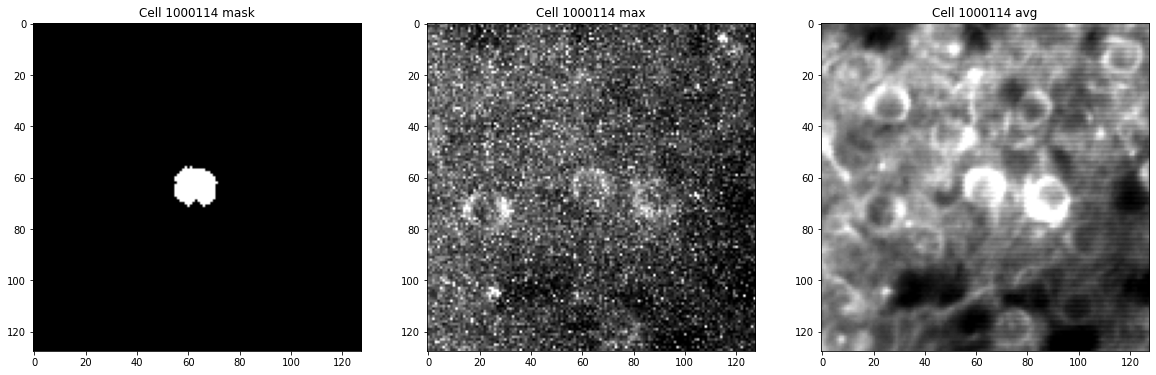

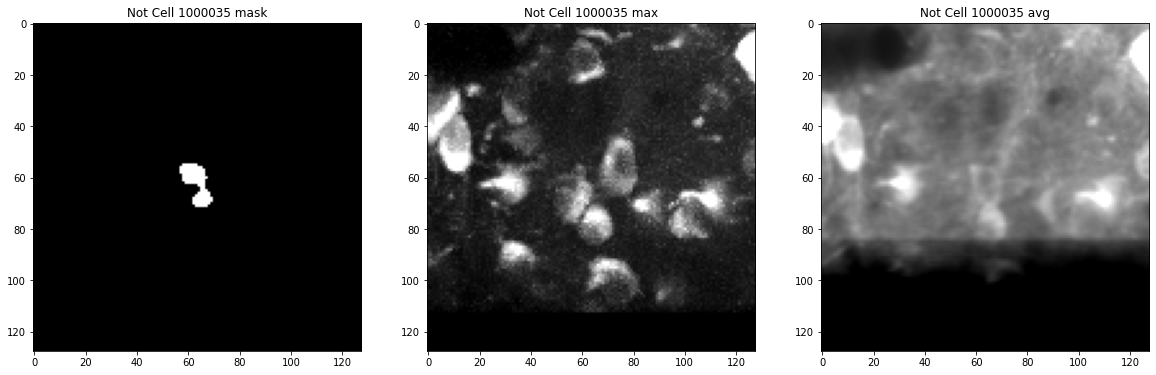

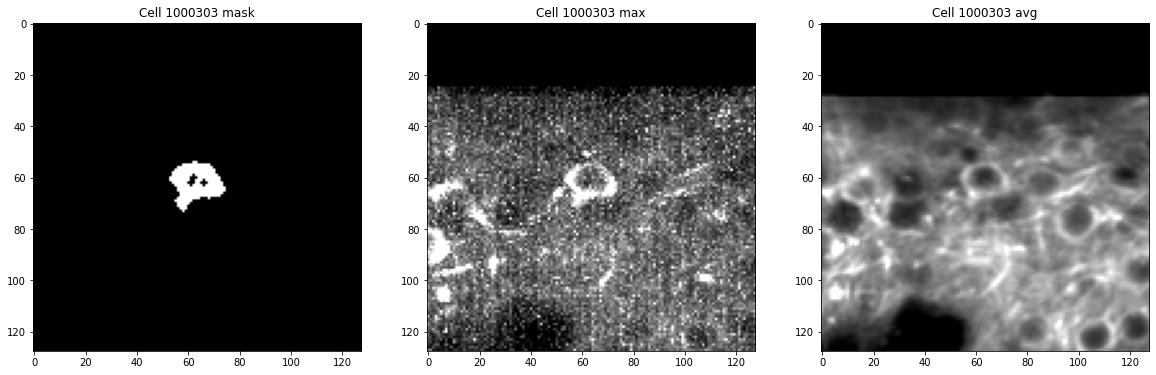

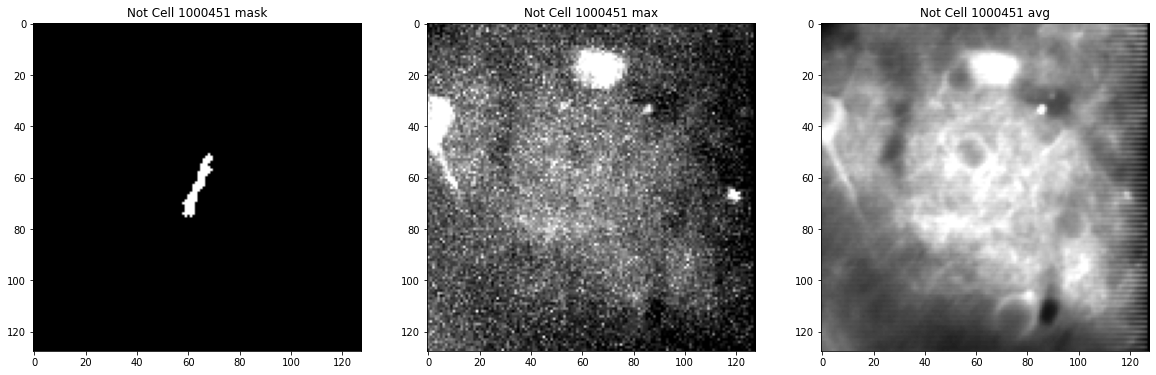

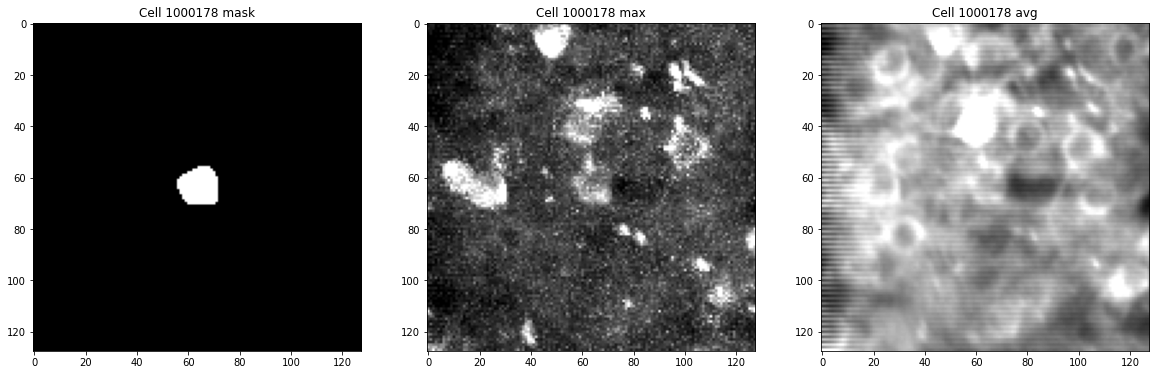

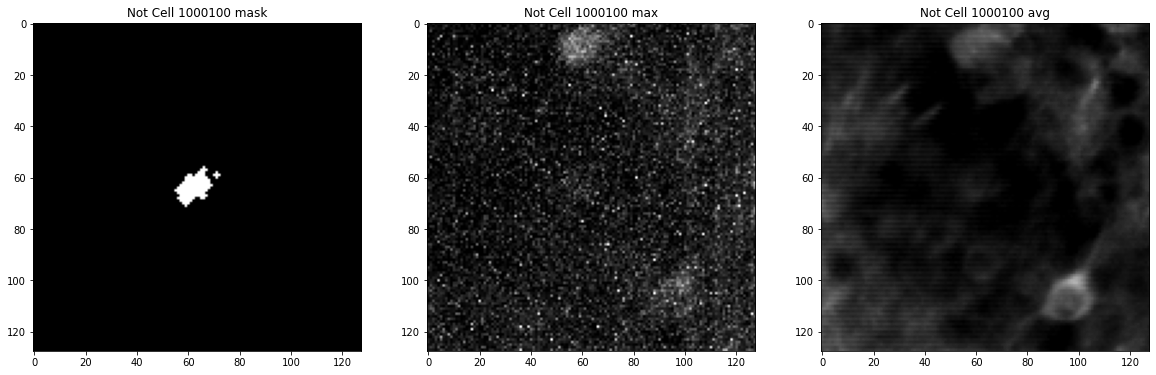

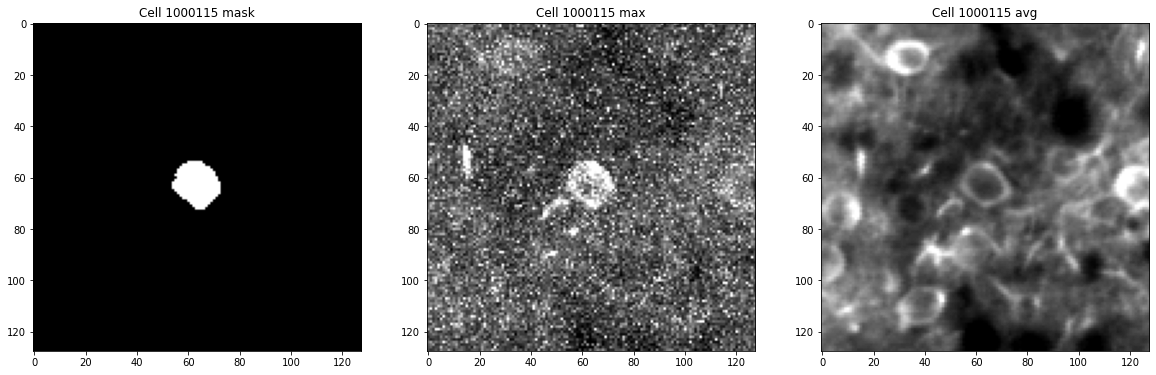

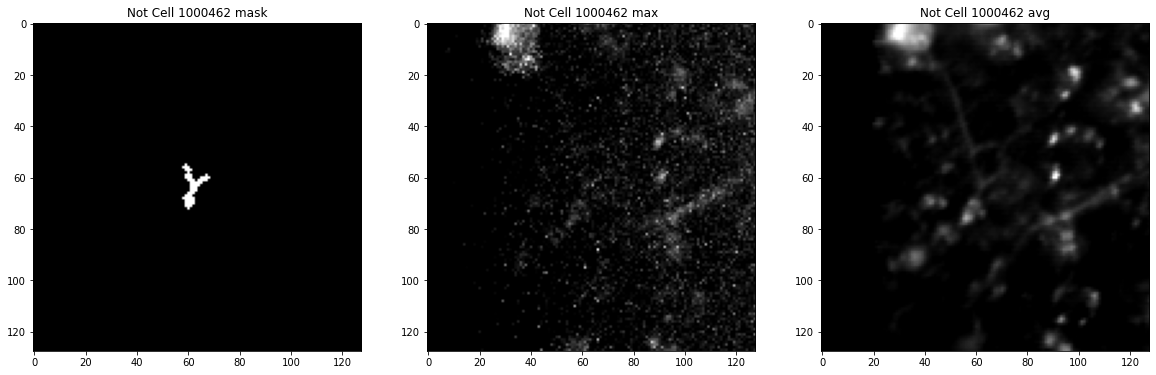

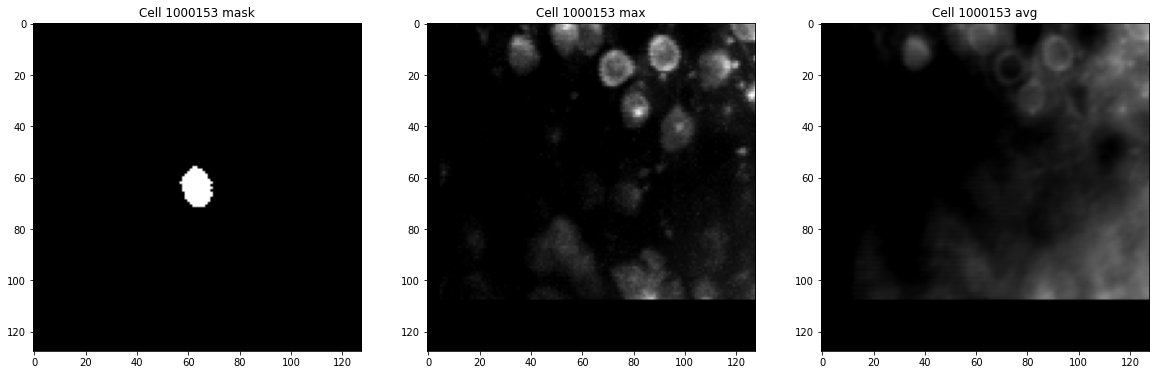

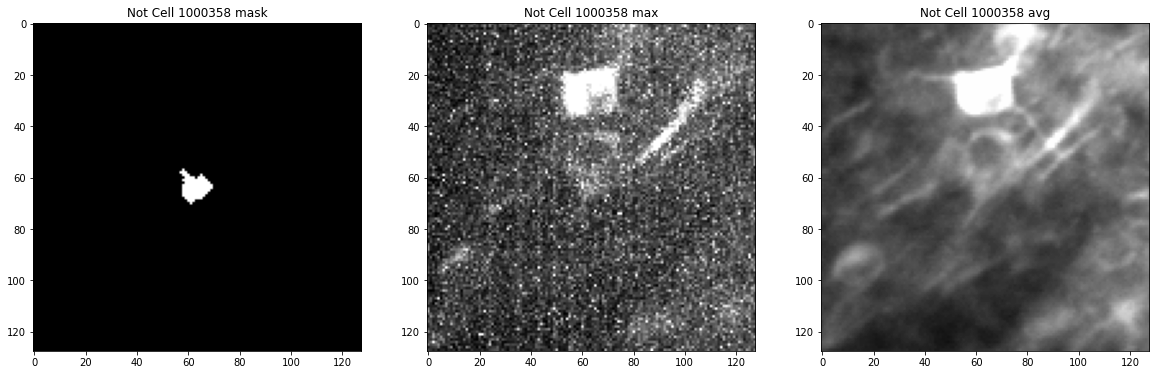

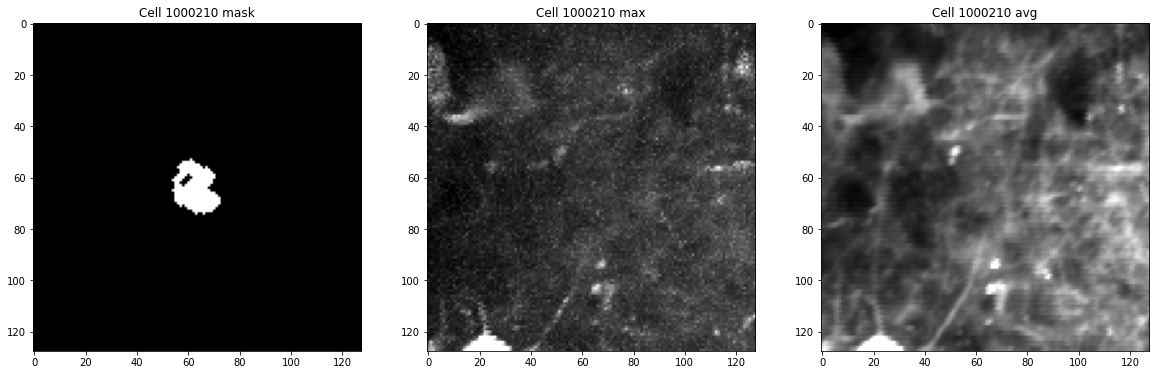

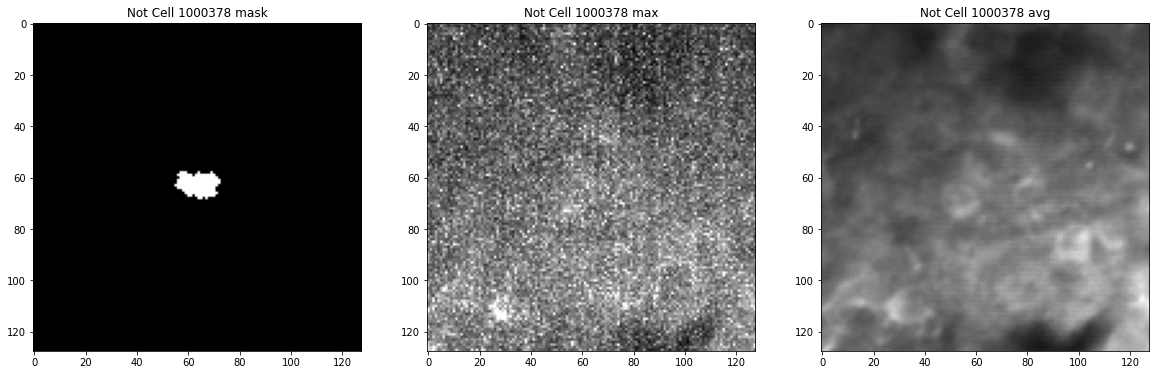

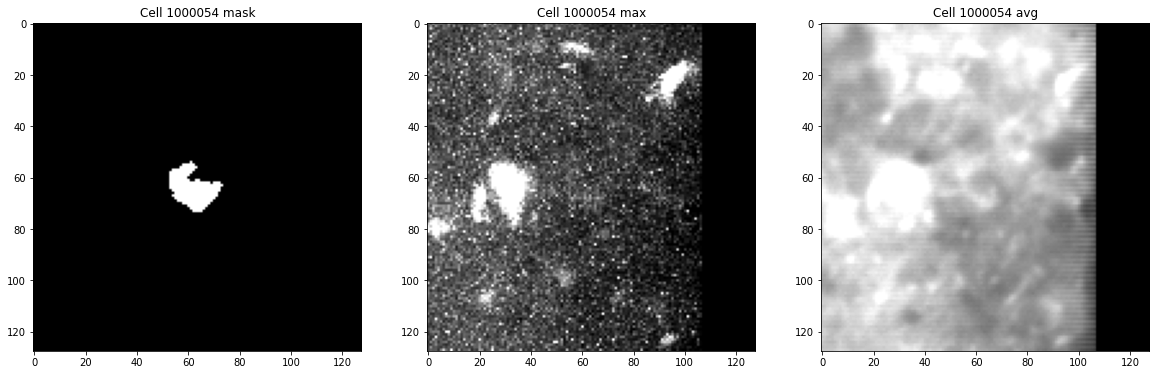

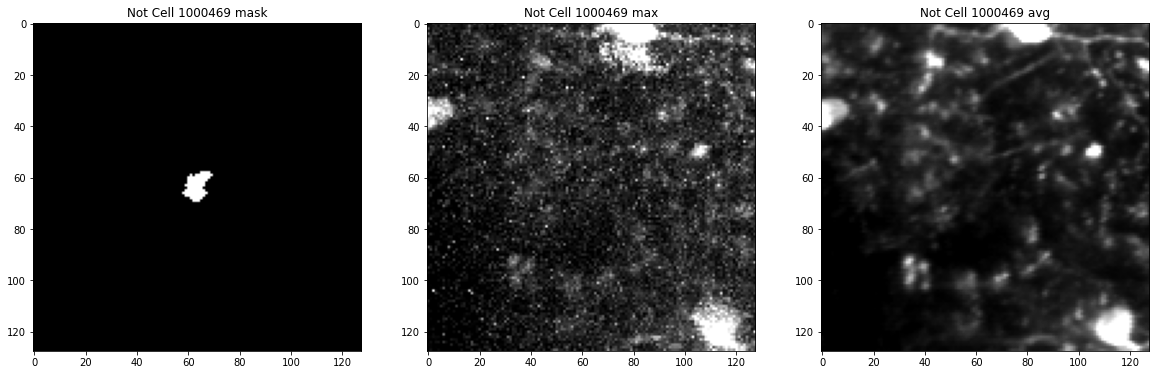

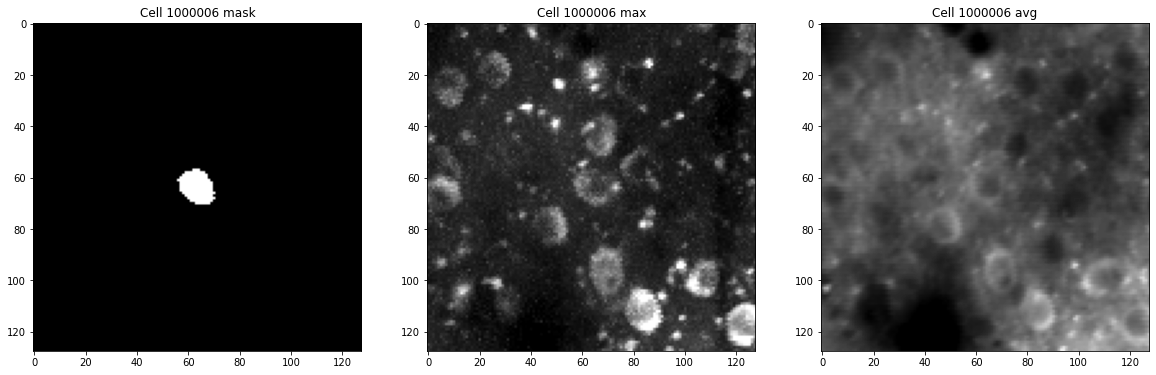

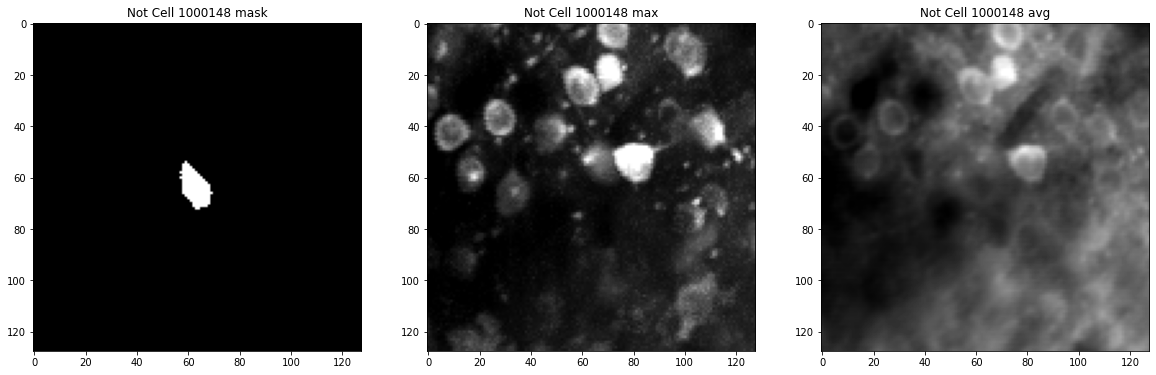

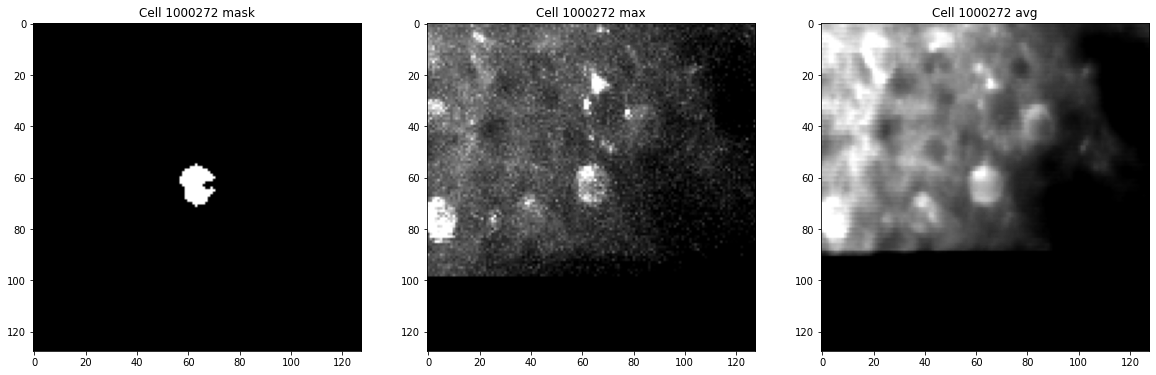

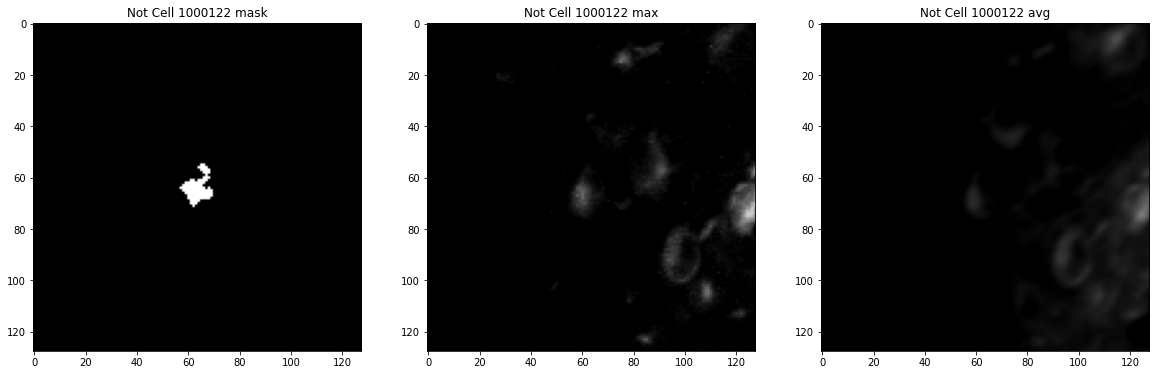

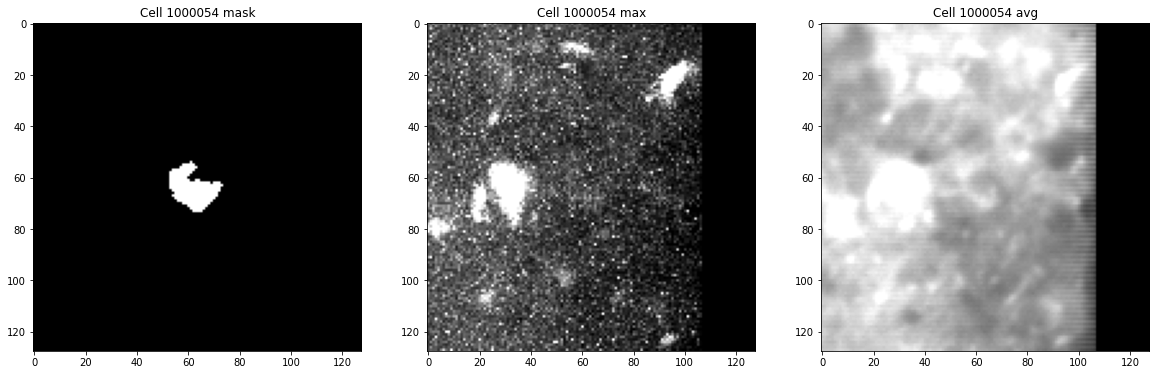

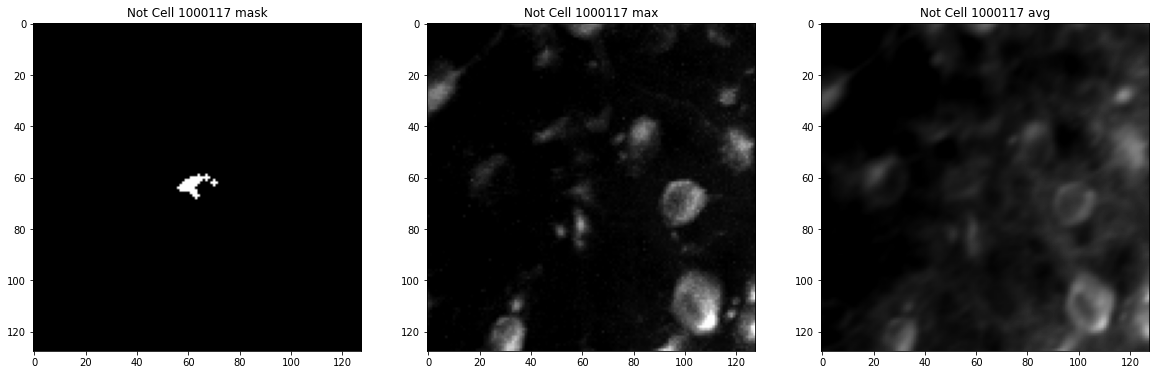

In [63]:
for _ in range(20):
    display_differently_labeled_rois()